# Gender image Classification using Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import cv2 as cv
import random

# Directory(train and valid)

In [2]:
base_dir=r"D:\Training"

In [74]:
img_size=50
categories=[]
for c in os.listdir(base_dir):
    categories.append(c)
print(categories)

['female', 'male']


In [4]:
train_data = []
for c in categories:
    path = os.path.join(base_dir,c)
    class_num = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path,img))
        img_resized=cv.resize(img_arr,(img_size,img_size))
        train_data.append([img_resized, class_num])
print(len(train_data))

100%|██████████████████████████████████████████████████████████████████████████| 23766/23766 [00:02<00:00, 8415.72it/s]

46955


In [5]:
type(train_data)

list

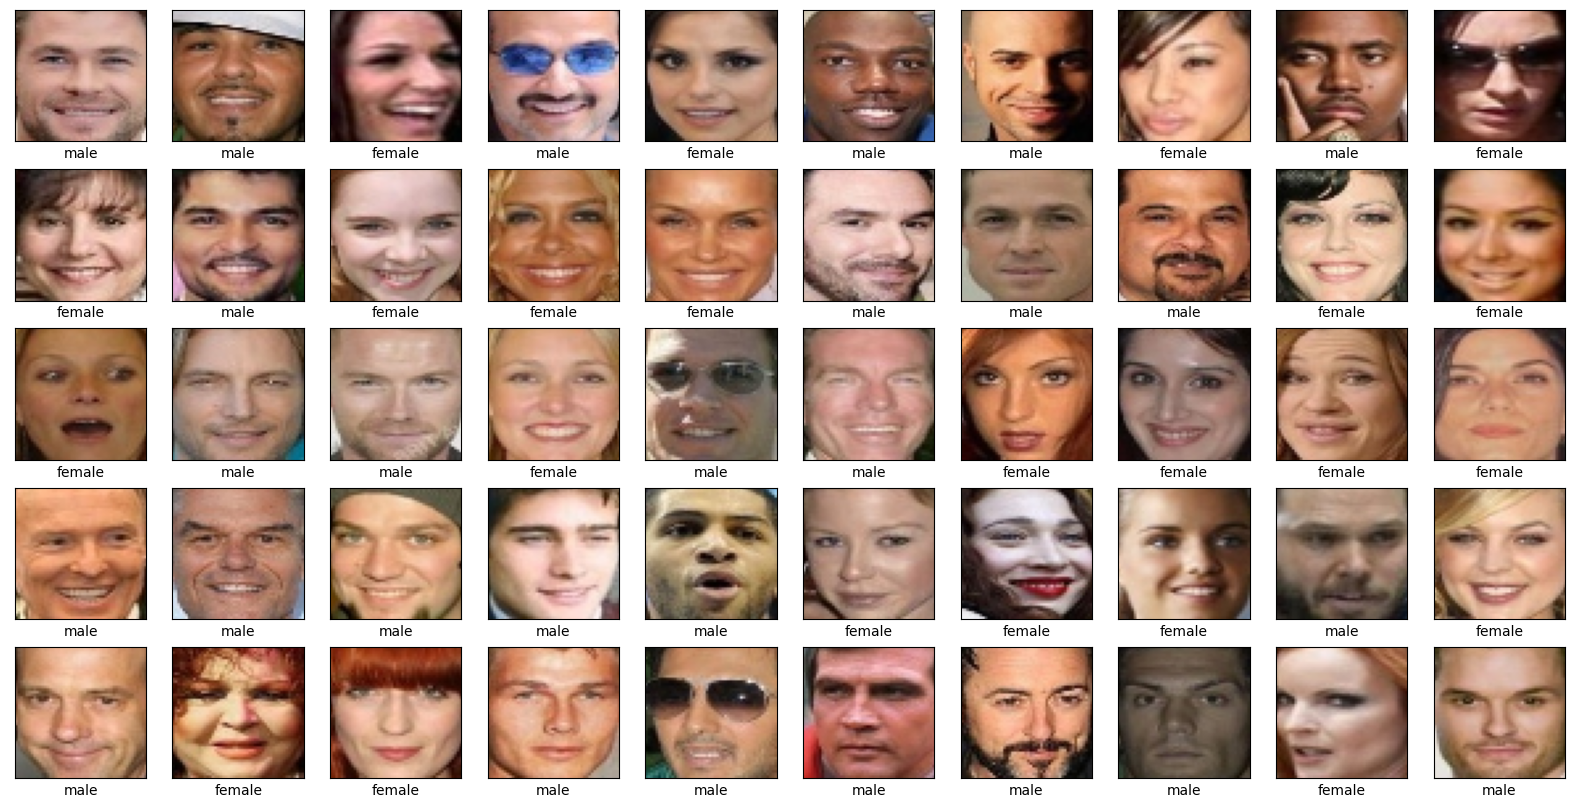

In [6]:
random.shuffle(train_data)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    image = train_data[i][0]
    image_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)  
    plt.imshow(image_color,cmap='gray')
    plt.xlabel(categories[train_data[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

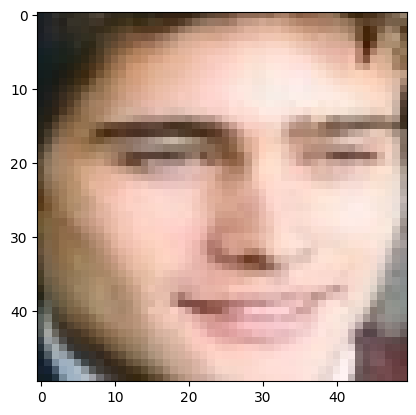

In [7]:
x=train_data[33][0]
image=cv.cvtColor(x,cv.COLOR_BGR2RGB)
plt.imshow(image)

In [8]:
valid_dir=r"D:\Validation"

In [9]:
#validation
valid_data=[]
for c in categories:
    path = os.path.join(valid_dir,c)
    class_num = categories.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path,img))
        img_resized=cv.resize(img_arr,(img_size,img_size))
        valid_data.append([img_resized, class_num])
print(len(valid_data))

100%|████████████████████████████████████████████████████████████████████████████| 5808/5808 [00:00<00:00, 8478.84it/s]

11649


In [10]:
random.shuffle(train_data)
random.shuffle(valid_data)

# Normalization

In [11]:
X_train=[]
y_train=[]

for img,label in train_data:
    X_train.append(img)
    y_train.append(label)
X_train=np.array(X_train).astype('float32') / 255.0
y_train = np.array(y_train)
print(f"X_train= {X_train.shape} Y_train= {y_train.shape}")

X_train= (46955, 50, 50, 3) Y_train= (46955,)


In [12]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32') /255.0
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (11649, 50, 50, 3) Y_valid= (11649,)


# Model Building

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
num_samples, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape((num_samples, height * width * channels))

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_reshaped, y_train, test_size=0.2, random_state=42
)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_split, y_train_split)

X_valid_reshaped = X_valid.reshape((X_valid.shape[0], height * width * channels))
y_pred_valid = rf_classifier.predict(X_valid_reshaped)

accuracy = accuracy_score(Y_valid, y_pred_valid)
print(f"Accuracy on the validation set: {accuracy}")

Accuracy on the validation set: 0.8761267061550347


# Prediction

In [52]:
image_path=r"D:\Validation\female\113047.jpg.jpg"

In [53]:
img = cv.imread(image_path)
img = cv.resize(img, (width, height))  
img_array = img.astype(np.float32) / 255.0

In [54]:
img_reshaped = img_array.reshape((1, height * width * channels))

In [55]:
gender_prediction = rf_classifier.predict(img_reshaped)

In [56]:
predicted_class = 'male' if gender_prediction[0] == 0 else 'female'

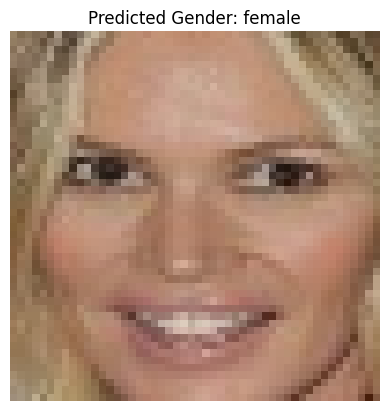

In [57]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  
plt.title(f"Predicted Gender: {predicted_class}")
plt.axis('off')  
plt.show()

In [67]:
image_path2=r"D:\Validation\male\073024.jpg.jpg"

In [68]:
img1 = cv.imread(image_path2)
img1 = cv.resize(img1, (width, height))  
img1_array = img1.astype(np.float32) / 255.0

In [69]:
img1_reshaped = img1_array.reshape((1, height * width * channels))

In [70]:
gender_prediction = rf_classifier.predict(img1_reshaped)

In [71]:
predicted_class = 'male' if gender_prediction[0] == 0 else 'female'

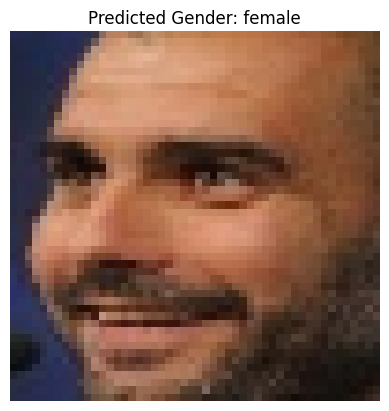

In [72]:
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))  
plt.title(f"Predicted Gender: {predicted_class}")
plt.axis('off')  
plt.show()